# Plot the data collected for the thesis

First load some libraries for the analysis and setting the plotting style

In [33]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import xlrd

import sys
sys.path.insert(0, './Code')
from book_plots import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

## Read the data from the excel file

In [34]:
gesinasTable = pd.read_excel("data/fachklassenliste_KMK.xls")

*** formula/tFuncVar unknown FuncID:255


In [35]:
book = xlrd.open_workbook("data/fachklassenliste_KMK.xls", formatting_info=True)
sheets = book.sheet_names()
print ("sheets are: ", sheets)

*** formula/tFuncVar unknown FuncID:255
sheets are:  ['Tabelle1']


In [36]:
sheet = book.sheet_by_index(0)
rows, cols = sheet.nrows, sheet.ncols
print(rows, cols)

485 24


## Some information is given by color of the excel cell

Set the value 1 for cells that have the color green

In [37]:
colorInfoArray = np.zeros(shape=(gesinasTable.shape[0]+1,gesinasTable.shape[1]))
for row in range(gesinasTable.shape[0]):
    for col in range(gesinasTable.shape[1]):
        #print("row, cell is: ", row+1, col+1)
        thecell = sheet.cell(row, col)
        #print(thecell)
        xfx = sheet.cell_xf_index(row,col)
        xf = book.xf_list[xfx]
        bgx = xf.background.pattern_colour_index
        colorInfoArray[row,col] = xf.background.pattern_colour_index
        #print (bgx)

In [38]:
gesinasTable.shape

(456, 18)

In [39]:
colorInfoArray.shape

(457, 18)

In [40]:
for row in range(gesinasTable.shape[0]):
    for col in range(1,gesinasTable.shape[1]):
        if (colorInfoArray[row+1,col] == 17.0):
            gesinasTable[gesinasTable.columns[col]][row] = 1

Look at the first 5 rows of the data

In [41]:
gesinasTable.head(5)

,Ausbildungsberuf,NRW,RLP,Hessen,Sachsen,Sachsen Anhalt,Niedersachsen,Bremen,Berlin,Baden Württemberg,MVP,SH,Saarland,Thüringen,Bayern,Hamburg,Brandenburg,info
0,Aspahaltbauer,Essen,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN
1,Aufbereitungsmechaniker,NaN,NaN,NaN,1,1,NaN,NaN,NaN,1,NaN,NaN,1,1,Wiesau,NaN,NaN,NaN
2,< Feuerfeste und keramihsce Rohstoffe,Duisburg,NaN,1,NaN,NaN,1,1,NaN,NaN,1,1,NaN,NaN,NaN,1,1,NaN
3,< Naturstein / < Sand und Kies,Duisburg,1,1,NaN,NaN,1,1,NaN,NaN,1,1,NaN,NaN,NaN,1,NaN,NaN
4,< Naturstein / < Sand und Kies,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,erfurt,NaN,NaN,1,* Auszubildende aus dem Land Berlin besuchen B...


The NaN values are cells that are empty. To avoid some errors with NaN i will set the empty cells to the value **"leer"**

In [42]:
gesinasTable = gesinasTable.fillna('leer')

In [43]:
gesinasTable.head()

,Ausbildungsberuf,NRW,RLP,Hessen,Sachsen,Sachsen Anhalt,Niedersachsen,Bremen,Berlin,Baden Württemberg,MVP,SH,Saarland,Thüringen,Bayern,Hamburg,Brandenburg,info
0,Aspahaltbauer,Essen,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,leer
1,Aufbereitungsmechaniker,leer,leer,leer,1,1,leer,leer,leer,1,leer,leer,1,1,Wiesau,leer,leer,leer
2,< Feuerfeste und keramihsce Rohstoffe,Duisburg,leer,1,leer,leer,1,1,leer,leer,1,1,leer,leer,leer,1,1,leer
3,< Naturstein / < Sand und Kies,Duisburg,1,1,leer,leer,1,1,leer,leer,1,1,leer,leer,leer,1,leer,leer
4,< Naturstein / < Sand und Kies,leer,leer,leer,1,1,leer,leer,leer,leer,leer,leer,1,erfurt,leer,leer,1,* Auszubildende aus dem Land Berlin besuchen B...


In [44]:
gesinasTable[['Brandenburg','info']][((gesinasTable['Brandenburg']==1) & (gesinasTable['info']!='leer'))][:5]

,Brandenburg,info
4,1,* Auszubildende aus dem Land Berlin besuchen B...
15,1,Auszubildende aus dem Umkreis Berlin besuchen ...
31,1,Auszubildende aus dem Umkreis Berlin besuchen ...
34,1,Auszubildende aus dem Umkreis Berlin besuchen ...
40,1,Auszubildende aus dem Umkreis Berlin besuchen ...


## Analysing the data

### Let's have a look an the number of schools per state

In [45]:
gesinasTable[(gesinasTable['NRW']!= 1) & (gesinasTable['NRW']!= 'leer')]['NRW']

0                 Essen
2              Duisburg
3              Duisburg
7              Lübbecke
9         Gelsenkirchen
13               Beckum
15                Essen
17        Gelsenkirchen
29     Duisburg-Homberg
39             Dortmund
44             Dortmund
60             Dortmund
91             Lübbecke
106       Gelsenkirchen
111            Solingen
116               Hagen
119       Gelsenkirchen
125       Gelsenkirchen
138           Rheinbach
163            Dortmund
176           Rheinbach
182           Rheinbach
187               Essen
192            Solingen
213           Rheinbach
226            Dortmund
254                Köln
264                Köln
281            Solingen
303            Solingen
323       Gelsenkirchen
349       Gelsenkirchen
352             Herford
355       Gelsenkirchen
374            Dortmund
390       Gelsenkirchen
394                Köln
422       Gelsenkirchen
436           Rheinbach
439            Duisburg
442               Soest
444          Obe

In [60]:
# Count the Schools
len(gesinasTable[(gesinasTable['NRW']!= 1) & (gesinasTable['NRW']!= 'leer')]['NRW'])

42

### Create a dictonary with the states and the number of schools

Create a dictonary **dictCount** to save the values. The columns has to be cleaned of the first column and the last

In [48]:
dictCount = {'NRW': 0}
laenderList = gesinasTable.columns
listLaender = laenderList.delete([0,17])

### Function to count the number of schools per state

In [49]:
for item in listLaender:
    dictCount[item] = len(gesinasTable[(gesinasTable[item]!= 1) & (gesinasTable[item]!= 'leer')][item])

In [50]:
dictCount

{'Baden Württemberg': 49,
 'Bayern': 83,
 'Berlin ': 14,
 'Brandenburg': 19,
 'Bremen': 4,
 'Hamburg': 32,
 'Hessen': 18,
 'MVP': 4,
 'NRW': 42,
 'Niedersachsen': 24,
 'RLP': 14,
 'SH': 38,
 'Saarland': 1,
 'Sachsen': 55,
 'Sachsen Anhalt': 14,
 'Thüringen': 42}

Repeat this for the number of cases where there are visitors from an other state

In [51]:
dictTravel = {}

In [52]:
for item in listLaender:
    dictTravel[item] = len(gesinasTable[gesinasTable[item]== 1][item])

In [53]:
dictTravel

{'Baden Württemberg': 89,
 'Bayern': 58,
 'Berlin ': 95,
 'Brandenburg': 164,
 'Bremen': 103,
 'Hamburg': 130,
 'Hessen': 134,
 'MVP': 198,
 'NRW': 68,
 'Niedersachsen': 142,
 'RLP': 126,
 'SH': 132,
 'Saarland': 139,
 'Sachsen': 118,
 'Sachsen Anhalt': 171,
 'Thüringen': 127}

## Let's plot the data in histogramms
### First plot is number of schools per state

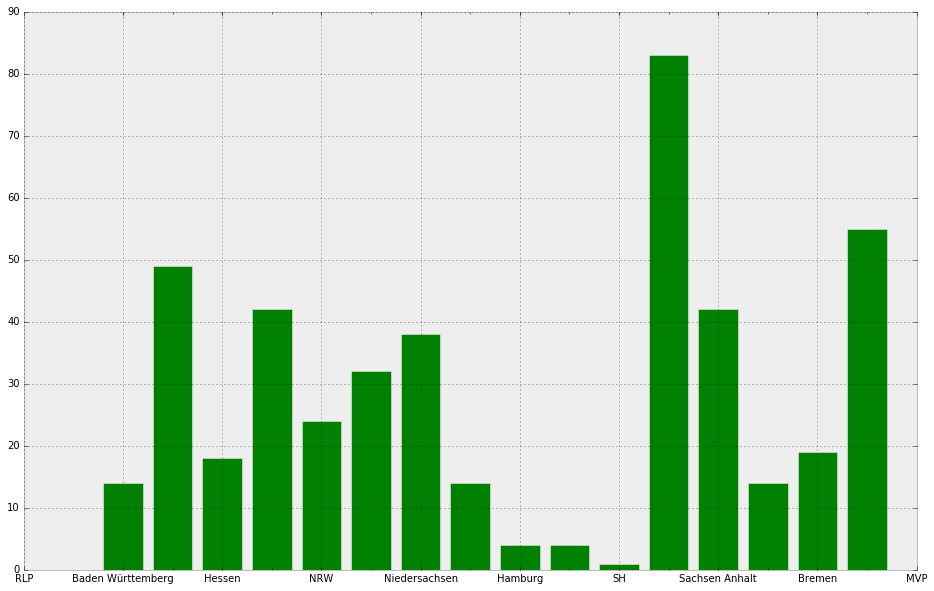

In [65]:
plotHistogrammSchools(dictCount)

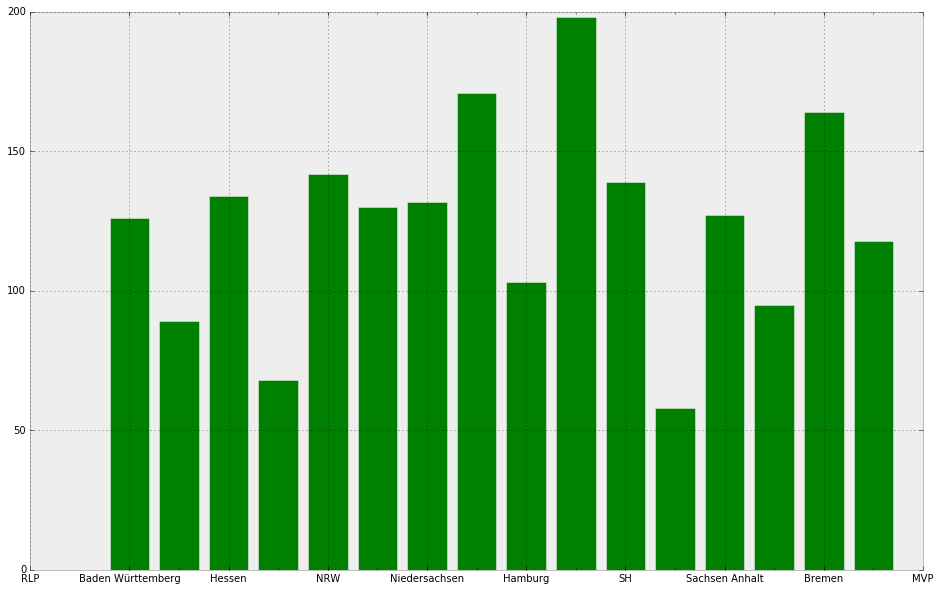

In [64]:
plotHistogrammSchools(dictTravel)